## THIS PROJECT IS BASED ON SUPERVISED ML ALGORITHM NAMED 'DECISION TREE' FOR PREDICTING WHETHER A PERSON HAS HEART DISEASE OR NOT.
Therefore it's Classification problem. 

In [165]:
#The first step is calling our dataset.
import pandas as pd
raw_df = pd.read_csv('heart.csv')

In [166]:
#let's see our data in the form of pandas dataframe.
raw_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [167]:
#Let's get some info about our data.
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [168]:
#Here 0 indicates nothing means it is of no use so we remove some rows having thal = 0 i.e., 7 rows
raw_df.thal.value_counts()

thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

In [169]:
raw_df = raw_df[raw_df.thal != 0]

In [170]:
raw_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [171]:
raw_df.thal.value_counts()

thal
2    544
3    410
1     64
Name: count, dtype: int64

Here we have no missing values in our dataset which is a good thing and also all features are in a numerical form which is best thing for our ML model.

In [172]:
#Shape
print("The shape of our data set is: ",raw_df.shape)

The shape of our data set is:  (1018, 14)


So we have 1025 rows/tuples and 14 columns/features.

In [173]:
#Let's see some statistics of our data.
raw_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,54.447937,0.696464,0.943026,131.636542,246.253438,0.146365,0.529470,149.187623,0.334971,1.074951,1.385069,0.759332,2.339882,0.513752
std,9.101835,0.460011,1.029886,17.574327,51.676406,0.353646,0.528086,23.006116,0.472212,1.177640,0.618506,1.032432,0.591982,0.500057
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.750000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [174]:
#Now let's do some exxploratory data analysis using visualisation techniques.
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
%matplotlib inline

#Some initials for better visualization.  
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14 
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

"Let's make some plots to understand the data properly."

<Axes: xlabel='age', ylabel='Count'>

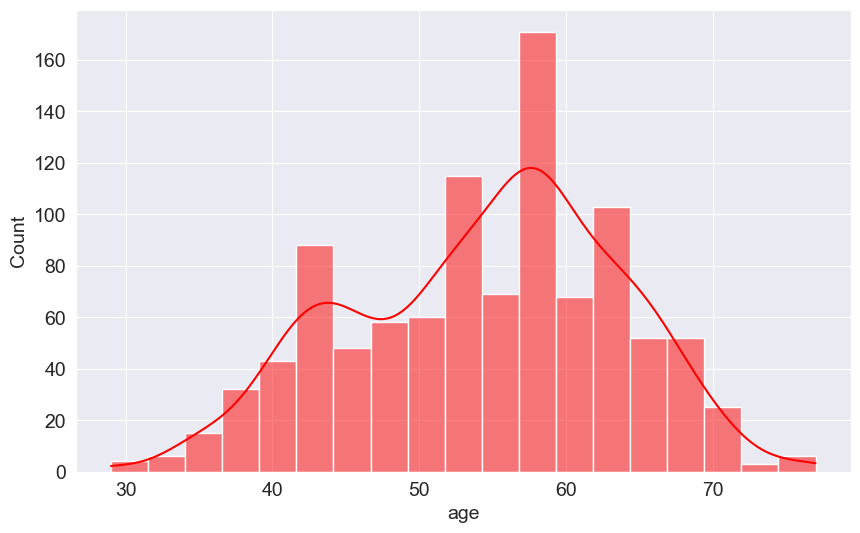

In [175]:
sns.histplot(raw_df.age, kde = True, color='red')

Here most of the peoples are from the age group of between 50 to 60 years.

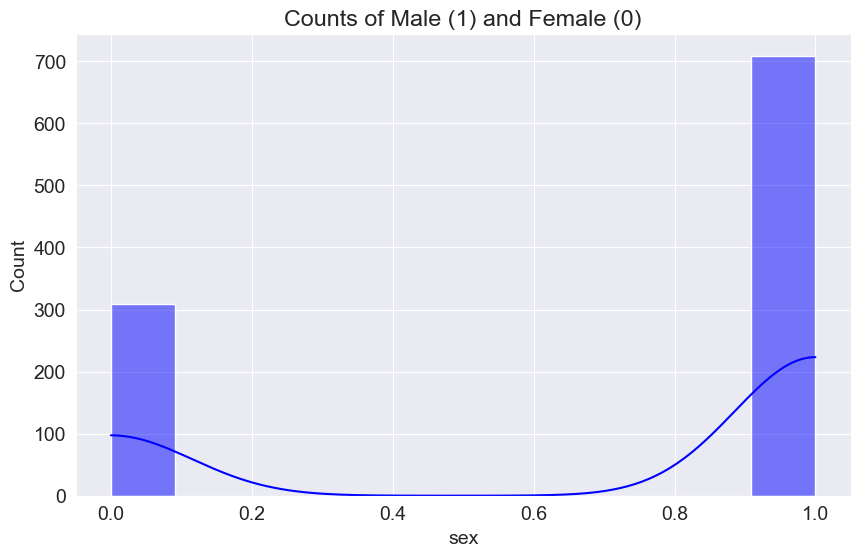

In [176]:
sns.histplot(raw_df.sex, kde=True, color = 'blue')
plt.title('Counts of Male (1) and Female (0)')
plt.show()

In [177]:
px.scatter(raw_df,
           x = 'age',
           y = 'restecg',
           color='target',
           title='Age vs Chest Pain')

In [178]:
px.scatter(raw_df,
           x = 'age',
           y = 'cp',
           color = 'target',
           title = 'Age vs Chest Pain')

In [179]:
px.scatter(raw_df,
             x = 'age',
             y = 'trestbps',
             color = 'target',
             title = 'Age vs Rest Blood Pressure')

Text(0.5, 1.0, 'Max Heart Rate vs Cholestrol')

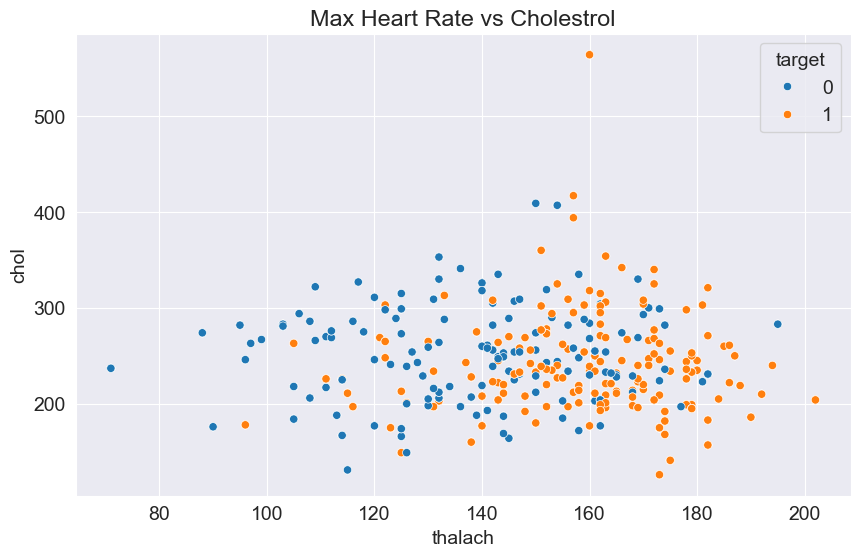

In [180]:
sns.scatterplot(x = 'thalach', y = 'chol', data = raw_df, hue = 'target')
plt.title('Max Heart Rate vs Cholestrol')

Text(0.5, 1.0, 'Max Heart Rate vs Chest Pain')

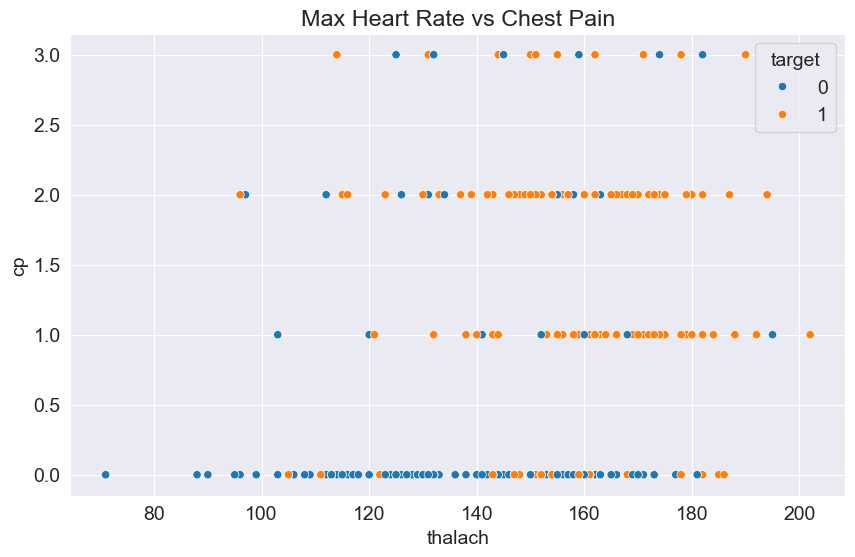

In [181]:
sns.scatterplot(x = 'thalach', y = 'cp', data = raw_df, hue = 'target')
plt.title('Max Heart Rate vs Chest Pain')

Text(0.5, 1.0, 'Age vs Coronary Artery Opening')

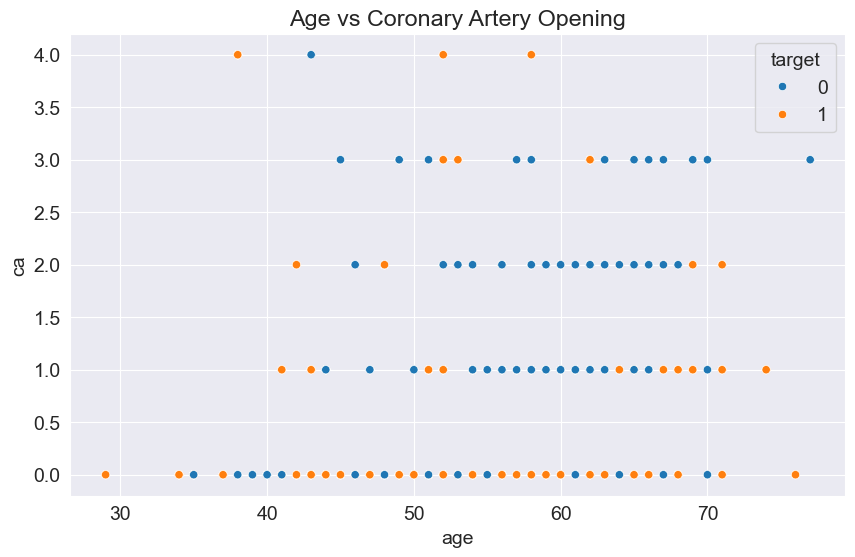

In [182]:
sns.scatterplot(x = 'age', y = 'ca', data = raw_df, hue = 'target')
plt.title("Age vs Coronary Artery Opening")

In [183]:
raw_df.ca.value_counts()

ca
0    571
1    226
2    134
3     69
4     18
Name: count, dtype: int64

In [184]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14 
matplotlib.rcParams['figure.figsize'] = (15, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<Axes: >

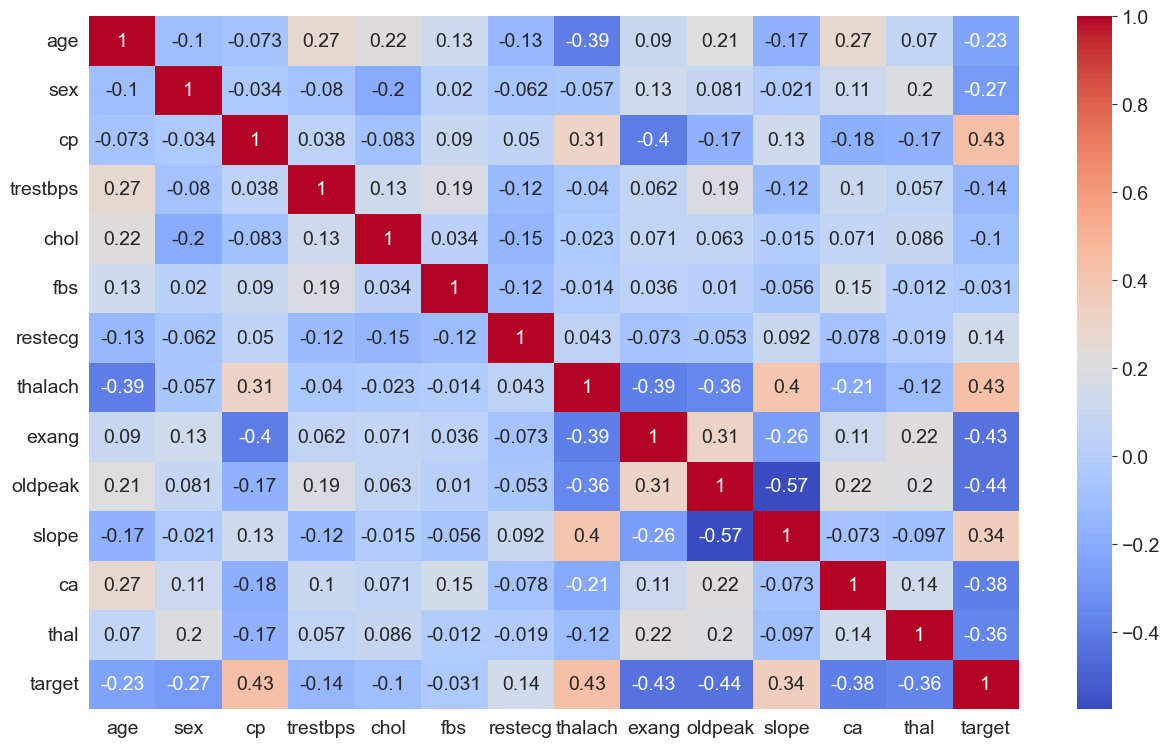

In [185]:
#Now let's see the correlation and plot a correlation matrix to see the correlation between the features.
corr_mat = raw_df.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')

## DATA PRE-PROCESSING..!

STEP-1: Splitting the data into Train, Val and Test Set..

In [186]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=29)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=29)

In [187]:
#Shape of train, val and test sets
print("Shape of Training Set: ", train_df.shape)
print("Shape of Validation Set: ", val_df.shape)
print("Shape of Test Set: ", test_df.shape)

Shape of Training Set:  (610, 14)
Shape of Validation Set:  (204, 14)
Shape of Test Set:  (204, 14)


In [188]:
train_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
275,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
1012,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
315,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
310,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0
577,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1
836,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
216,65,1,0,135,254,0,0,127,0,2.8,1,1,3,0
880,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1


STEP-2 Identifying the input and target features/columns.

In [189]:
input_cols = list(train_df.columns)[0:-1]
target_col = 'target'

In [190]:
input_cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [191]:
target_col

'target'

We can now create inputs and targets for the training, validation and test sets for further processing and model training.


In [192]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [193]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [194]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [195]:
train_inputs

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
275,56,1,0,130,283,1,0,103,1,1.6,0,0,3
1012,48,1,1,110,229,0,1,168,0,1.0,0,0,3
315,42,1,3,148,244,0,0,178,0,0.8,2,2,2
310,61,1,0,120,260,0,1,140,1,3.6,1,1,3
577,70,1,0,130,322,0,0,109,0,2.4,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,62,1,1,128,208,1,0,140,0,0.0,2,0,2
836,53,0,0,138,234,0,0,160,0,0.0,2,0,2
216,65,1,0,135,254,0,0,127,0,2.8,1,1,3
880,57,1,0,132,207,0,1,168,1,0.0,2,0,3


In [196]:
train_targets

275     0
1012    0
315     1
310     0
577     0
       ..
814     1
836     1
216     0
880     1
690     1
Name: target, Length: 610, dtype: int64

Identify the numerical and categorical columns.

In [197]:
#Here we have all numerical columns and no categorical columns in the dataset.  
import numpy as np 
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [198]:
train_inputs[numerical_cols].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,54.486885,0.703279,0.990164,132.152459,245.418033,0.160656,0.526230,149.903279,0.331148,1.078852,1.375410,0.801639,2.329508
std,9.106774,0.457188,1.040984,17.988722,48.534997,0.367514,0.528468,22.465931,0.471012,1.192063,0.629112,1.060562,0.591079
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,47.250000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,137.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [199]:
train_inputs[categorical_cols].nunique()

Series([], dtype: float64)

STEP-3 Imputation. Since there are no missing values we don't have to impute anything into the data.

In [200]:
raw_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [201]:
train_inputs[numerical_cols].isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

STEP-4 Scaling the numerical values.

In [202]:
from sklearn.preprocessing import MinMaxScaler

In [203]:
scaler = MinMaxScaler()

In [204]:
scaler.fit(raw_df[numerical_cols])

MinMaxScaler()

In [205]:
#Fitting the scaler to our training, val and test data.
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [206]:
train_inputs[numerical_cols].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,0.530977,0.703279,0.330055,0.359929,0.272644,0.160656,0.263115,0.602315,0.331148,0.174008,0.687705,0.200410,0.664754
std,0.189724,0.457188,0.346995,0.169705,0.110810,0.367514,0.264234,0.171496,0.471012,0.192268,0.314556,0.265141,0.295539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380208,0.000000,0.000000,0.245283,0.196347,0.000000,0.000000,0.503817,0.000000,0.000000,0.500000,0.000000,0.500000
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.618321,0.000000,0.129032,0.500000,0.000000,0.500000
75%,0.666667,1.000000,0.666667,0.433962,0.340183,0.000000,0.500000,0.725191,1.000000,0.290323,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [207]:
train_inputs.shape

(610, 13)

STEP-5 Encoding categorical columns. Since we have no cateegorical data, we don't have to this also.

Let's check our pre-process data.

In [208]:
#Let's check our data shape from all our datasets.  
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (610, 13)
train_targets: (610,)
val_inputs: (204, 13)
val_targets: (204,)
test_inputs: (204, 13)
test_targets: (204,)


## Now it's time for training our ML model on training and validation data.

In [209]:
X_train = train_inputs[numerical_cols]
X_val = val_inputs[numerical_cols]
X_test = test_inputs[numerical_cols]

In [210]:
from sklearn.tree import DecisionTreeClassifier

In [211]:
model = DecisionTreeClassifier(random_state=29)

In [212]:
#Fitting the train inputs and train targets to the model.
model.fit(train_inputs[numerical_cols], train_targets)

DecisionTreeClassifier(random_state=29)

## Evaluation of model.

In [213]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [214]:
train_preds = model.predict(X_train)

In [215]:
train_preds

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [216]:
pd.value_counts(train_preds)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11732\1258350197.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



1    316
0    294
Name: count, dtype: int64

In [217]:
train_probs = model.predict_proba(X_train)

In [218]:
train_probs

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], shape=(610, 2))

In [219]:
acc_score = accuracy_score(train_targets, train_preds)

In [220]:
print("Accuracy on training set: ", (acc_score)*100, '%')

Accuracy on training set:  100.0 %


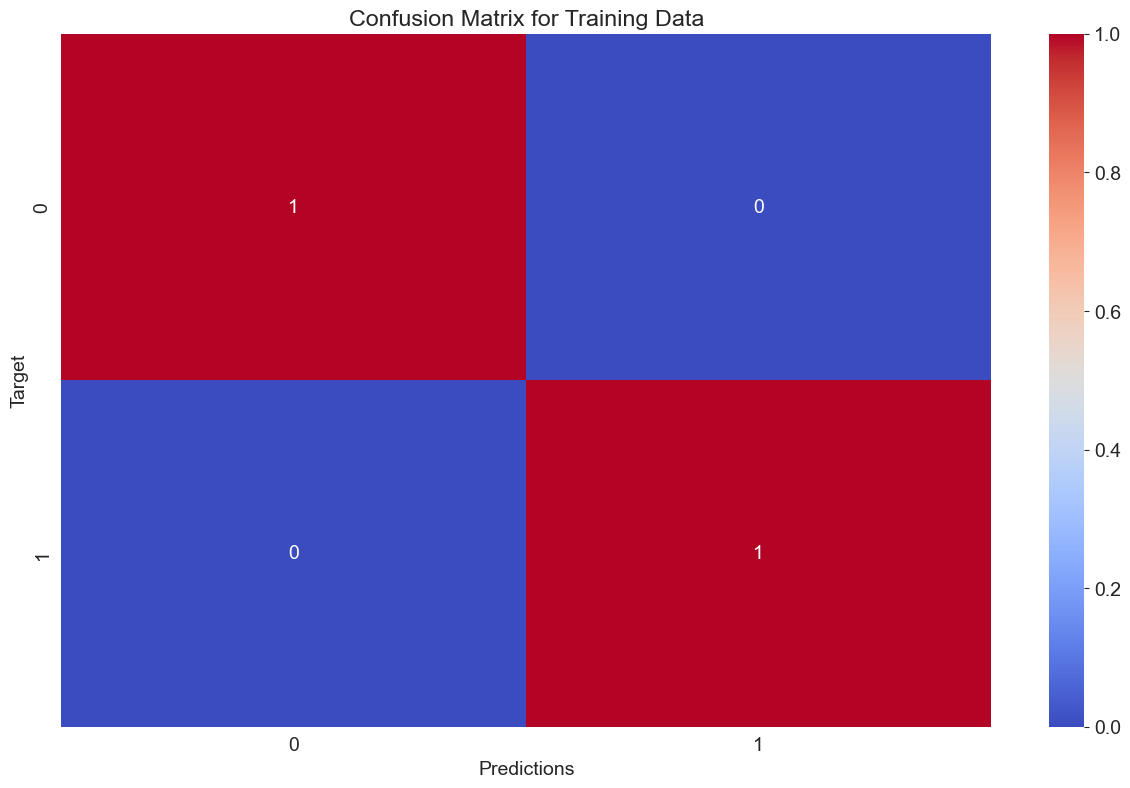

In [221]:
#let's make a confusion matrix for better visualisation of accuracy
train_con_mat = confusion_matrix(train_targets, train_preds, normalize='true')
sns.heatmap(train_con_mat, annot=True, cmap='coolwarm')
plt.xlabel("Predictions")
plt.ylabel("Target")
plt.title("Confusion Matrix for Training Data")
plt.show()

So we have 100% accuracy on our train set but we can't only depend of the training data. So let's accuracy on our validation set.

In [222]:
print("Accuracy on validation set: ", (model.score(X_val, val_targets))*100, '%')

Accuracy on validation set:  99.01960784313727 %


In [223]:
val_preds = model.predict(X_val)

In [224]:
val_preds

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0])

In [225]:
val_probs = model.predict_proba(X_val)

In [226]:
val_probs

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

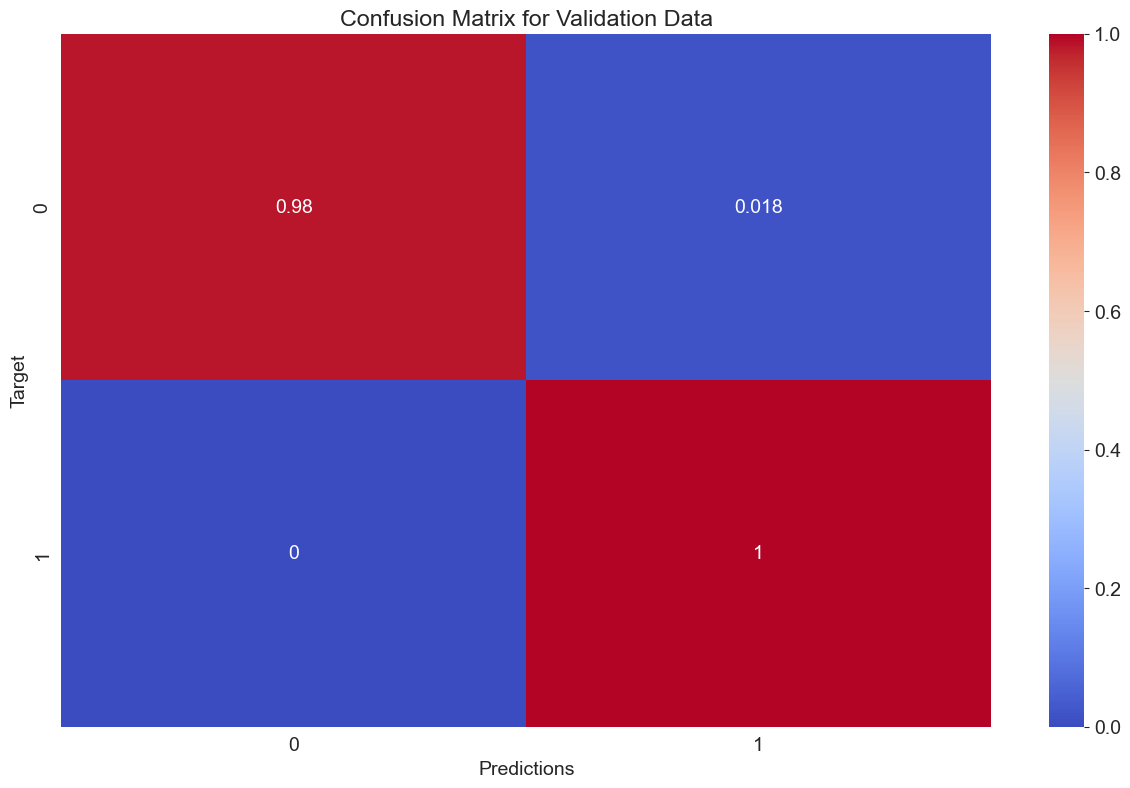

In [227]:
val_con_mat = confusion_matrix(val_targets, val_preds, normalize='true')
sns.heatmap(val_con_mat, annot=True, cmap='coolwarm')
plt.xlabel("Predictions")
plt.ylabel("Target")
plt.title("Confusion Matrix for Validation Data")
plt.show()

So it is nice to see 99% accuracy on our validation set also. It means work model is working good on new data also! It's a good sign for a Machine Learning Model.

Let's See accuracy on test set.

In [228]:
print("Accuracy on Test set: ", (model.score(X_test, test_targets))*100, '%')

Accuracy on Test set:  99.01960784313727 %


In [229]:
test_preds = model.predict(X_test)

In [230]:
test_preds

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0])

In [231]:
test_probs = model.predict_proba(X_test)

In [232]:
test_probs

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

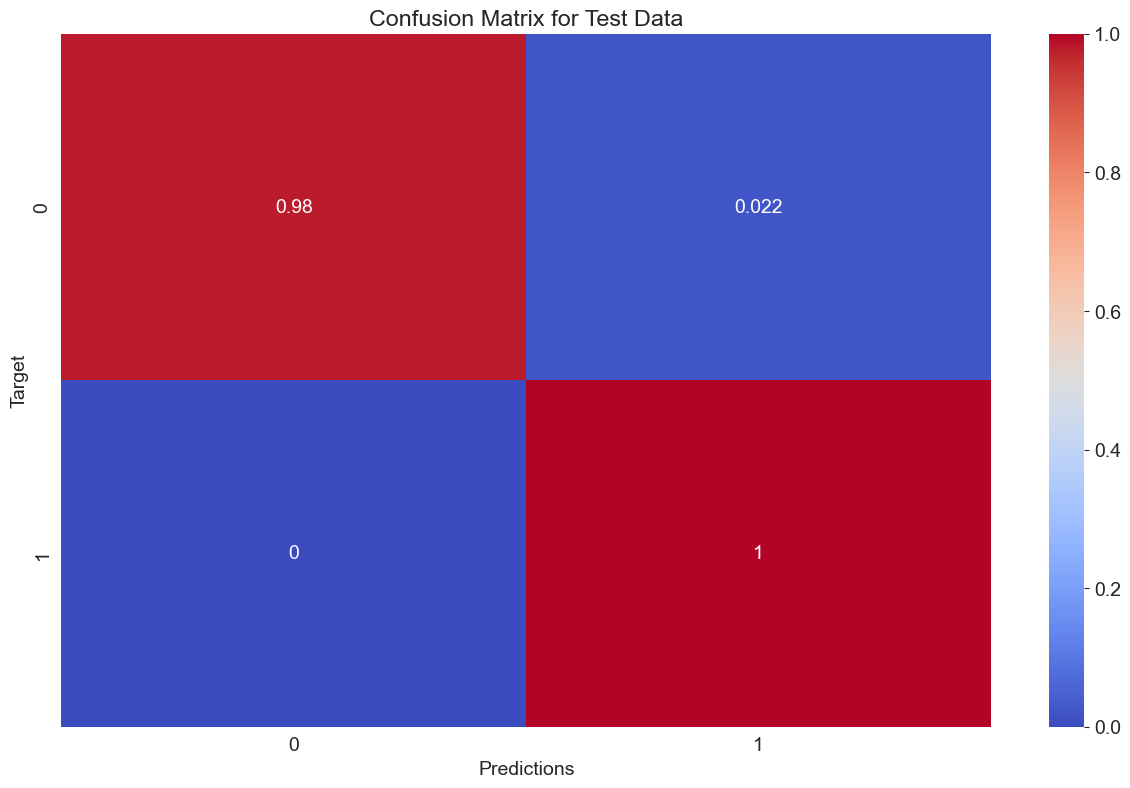

In [233]:
test_con_mat = confusion_matrix(test_targets, test_preds, normalize='true')
sns.heatmap(test_con_mat, annot=True, cmap='coolwarm')
plt.xlabel("Predictions")
plt.ylabel("Target")
plt.title("Confusion Matrix for Test Data")
plt.show()

## Visualisation of Tree

In [234]:
from sklearn.tree import plot_tree, export_text

[Text(0.4734042553191489, 0.9166666666666666, 'cp <= 0.167\ngini = 0.499\nsamples = 610\nvalue = [294, 316]'),
 Text(0.2074468085106383, 0.75, 'ca <= 0.125\ngini = 0.371\nsamples = 281\nvalue = [212, 69]'),
 Text(0.3404255319148936, 0.8333333333333333, 'True  '),
 Text(0.10638297872340426, 0.5833333333333334, 'thal <= 0.75\ngini = 0.5\nsamples = 118\nvalue = [58, 60]'),
 Text(0.0425531914893617, 0.4166666666666667, 'thalach <= 0.37\ngini = 0.371\nsamples = 69\nvalue = [17, 52]'),
 Text(0.02127659574468085, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.06382978723404255, 0.25, 'slope <= 0.25\ngini = 0.305\nsamples = 64\nvalue = [12, 52]'),
 Text(0.0425531914893617, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.0851063829787234, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1702127659574468, 0.4166666666666667, 'oldpeak <= 0.105\ngini = 0.273\nsamples = 49\nvalue = [41.0, 8.0]'),
 Text(0.14893617021276595, 0.25, 'chol <= 0.255\ngini = 0.498\nsamples = 17\nvalue = [9, 8]'),


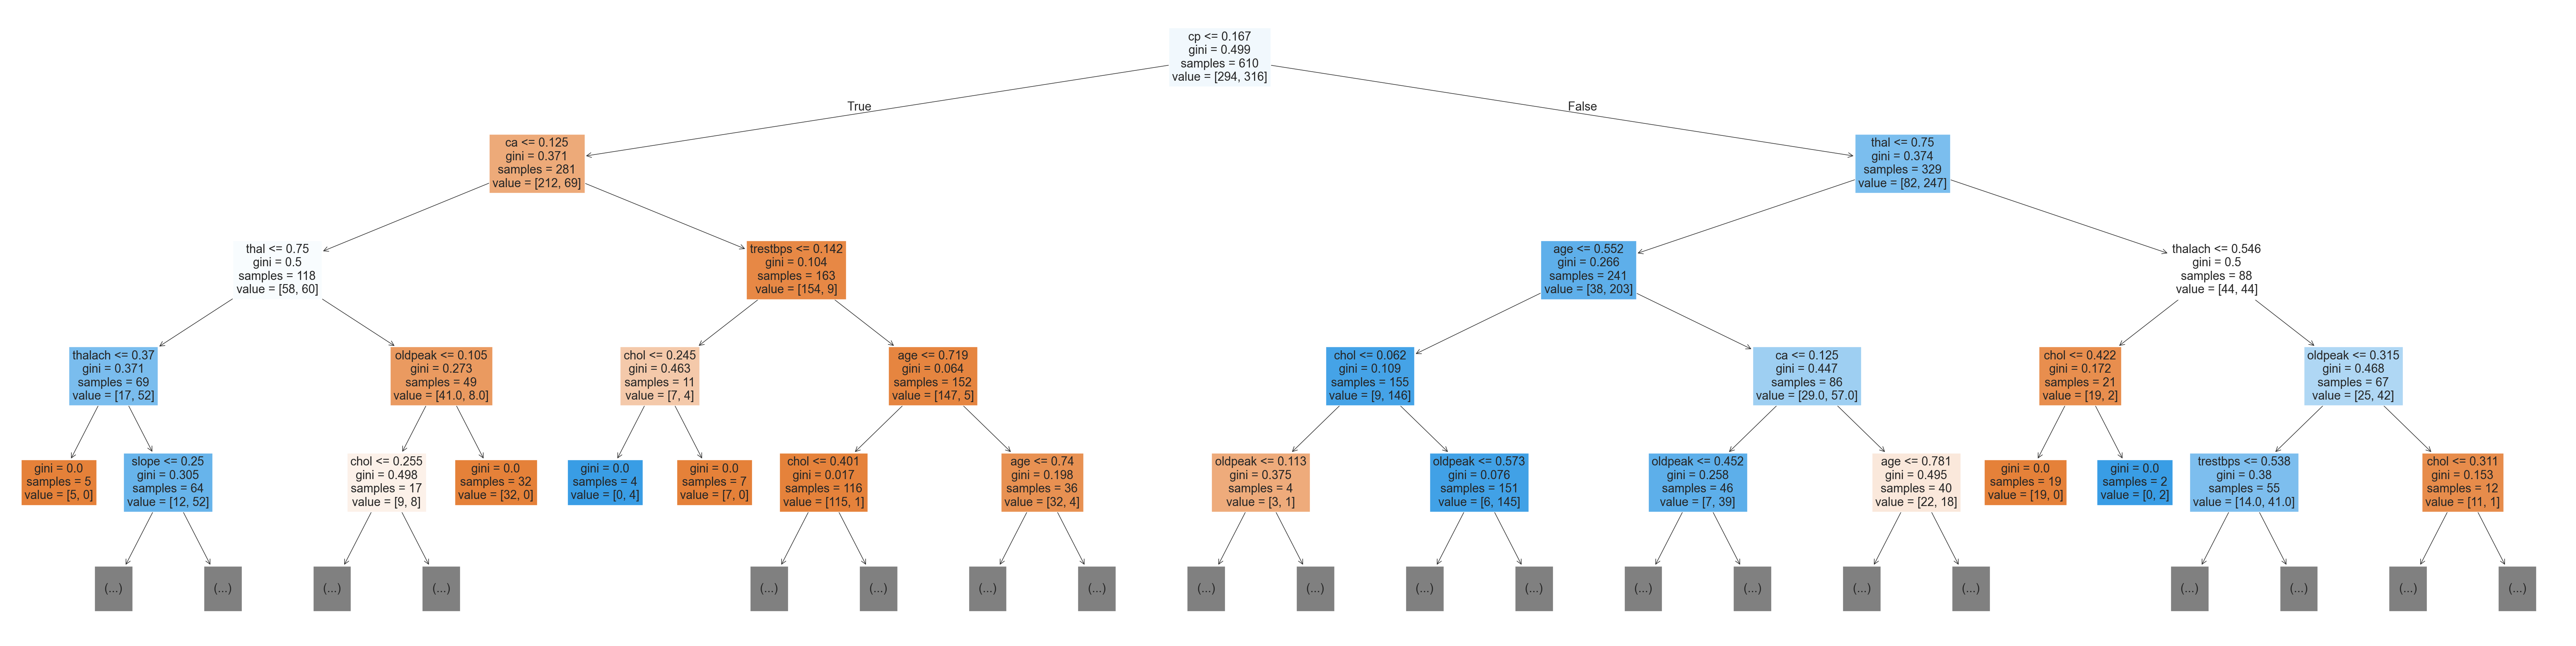

In [235]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=4, filled=True)

[Text(0.5, 0.9, 'cp <= 0.167\ngini = 0.499\nsamples = 610\nvalue = [294, 316]'),
 Text(0.25, 0.7, 'ca <= 0.125\ngini = 0.371\nsamples = 281\nvalue = [212, 69]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'thal <= 0.75\ngini = 0.5\nsamples = 118\nvalue = [58, 60]'),
 Text(0.0625, 0.3, 'thalach <= 0.37\ngini = 0.371\nsamples = 69\nvalue = [17, 52]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'oldpeak <= 0.105\ngini = 0.273\nsamples = 49\nvalue = [41.0, 8.0]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'trestbps <= 0.142\ngini = 0.104\nsamples = 163\nvalue = [154, 9]'),
 Text(0.3125, 0.3, 'chol <= 0.245\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'age <= 0.719\ngini = 0.064\nsamples = 152\nvalue = [147, 5]'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Text(0.46875, 0.1, '\n  (...)  \n'),


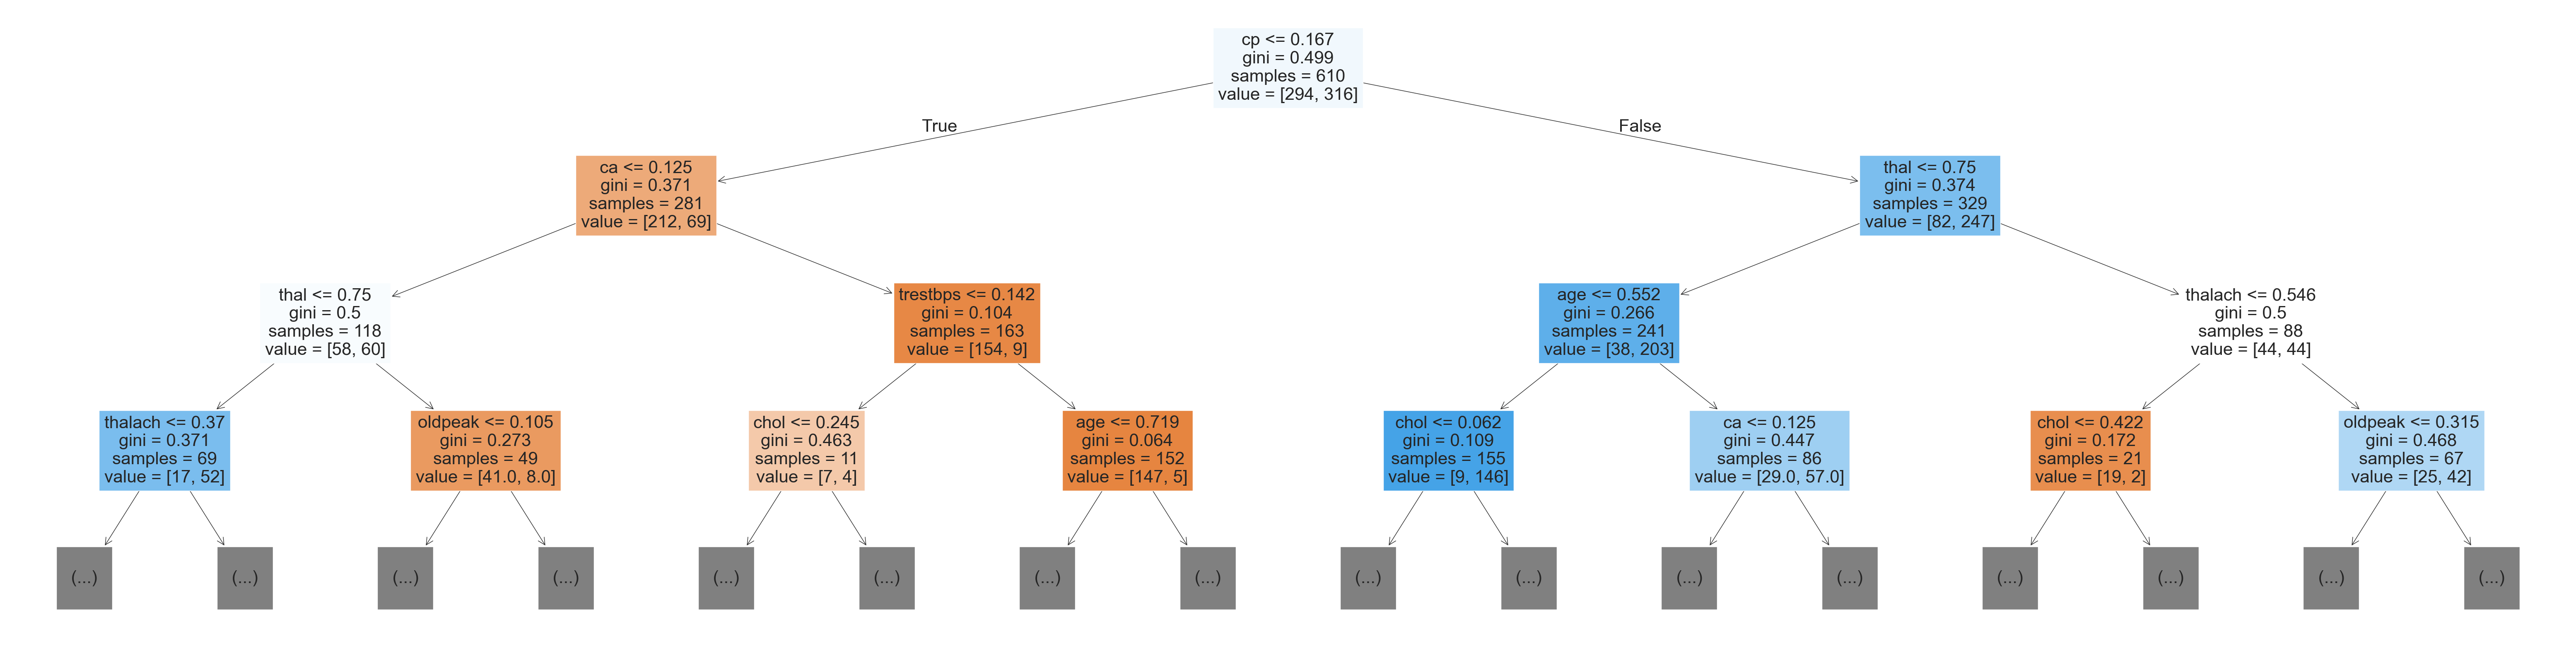

In [236]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True)

In [237]:
print("The maximum depth of the tree is: ", model.tree_.max_depth)

The maximum depth of the tree is:  10


In Decision Trees there is a feature call feature_importance i.e.,

In [238]:
model.feature_importances_

array([0.15060504, 0.03362374, 0.25398538, 0.04325308, 0.09385695,
       0.        , 0.02072593, 0.06773636, 0.00875456, 0.07812871,
       0.01364312, 0.11456537, 0.12112175])

In [239]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [240]:
importance_df

,feature,importance
2,cp,0.253985
0,age,0.150605
12,thal,0.121122
11,ca,0.114565
4,chol,0.093857
9,oldpeak,0.078129
7,thalach,0.067736
3,trestbps,0.043253
1,sex,0.033624
6,restecg,0.020726


# From upper dataframe, it is shown that the most important feature is CHEST PAIN in determining the HEART DISEASE !



<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

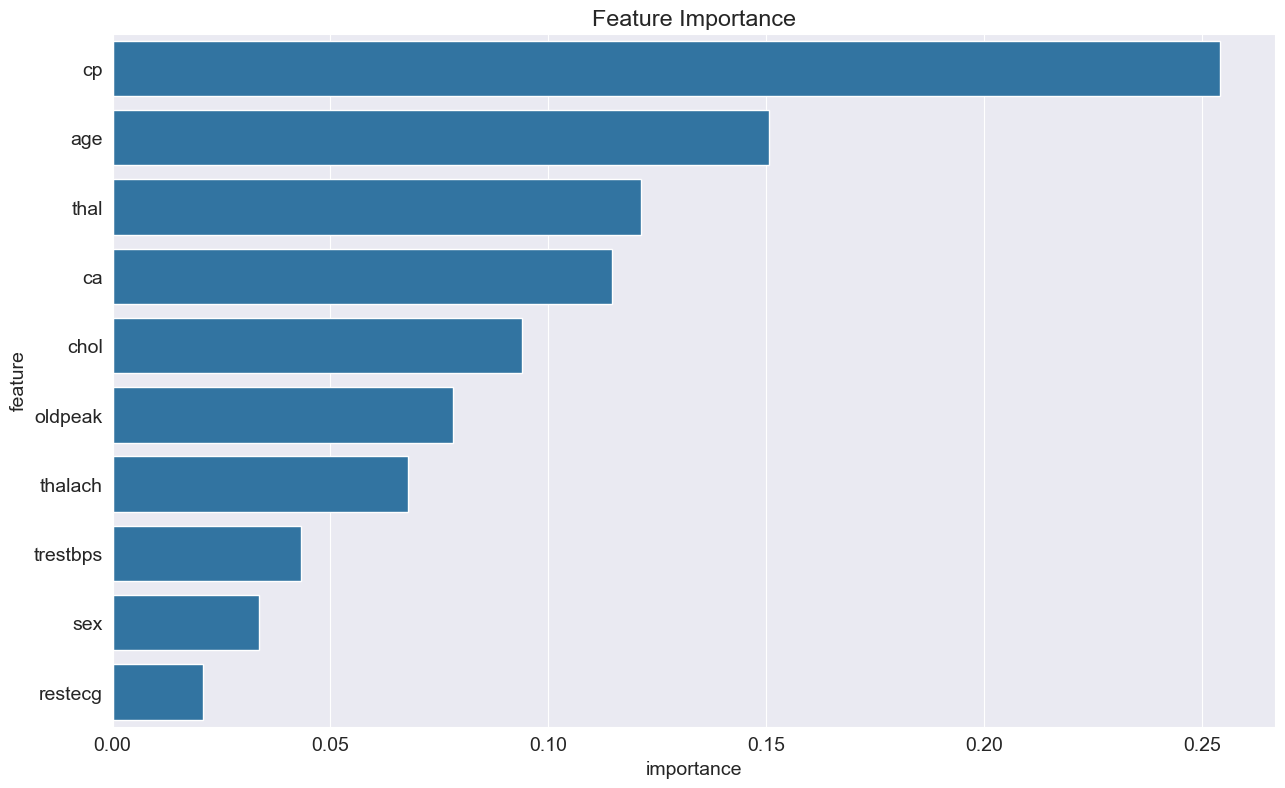

In [241]:
#Let's make a plot on that
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

Here there is no need of hyperparameter tuning because our accuracy is already 99% on both test and validation set. However if the data is more sensible we could do that also.


In [242]:
#Now let's test our model on a new data or a new input.
#But first we make a function for that task
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    X_input = input_df[numerical_cols]
    pred = model.predict(X_input)[0]
    if pred == 1:
        return f"HEART DISEASE DETECTED or Heart Disease: YES."
    else:
        return f"NO HEART DISEASE DETECTED or Heart Disease: NO."

In [243]:
#New example of input
new_input = {'age' : 45,
             'sex' : 1,
             'cp' : 0,
             'trestbps': 135,
             'chol' : 215,
             'fbs': 1,
             'restecg' : 0,
             'thalach':110,
             'exang':1,
             'oldpeak':1.5,
             'slope':0,
             'ca':3,
             'thal':2}

In [244]:
#New_input predicion
predict_input(new_input)

'NO HEART DISEASE DETECTED or Heart Disease: NO.'

## Here it concludes our project on Heart Disease Prediction !